# Super ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ with a fast tagged neutron

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)_{p_n>275 GeV/c}/\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)$$

last edit Oct-6, 2021

## definitions

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [15]:
main_data_path     = '/Users/erezcohen/Desktop/data/BAND/'
e_e_pi_data_path   = main_data_path + 'SIDIS_skimming/'
e_e_pi_n_data_path = main_data_path + 'merged_SIDIS_and_BAND_skimming/'

In [27]:
pi_charge_names  = ['piplus'   ,'piminus'  ]
pi_labels        = ['\pi^{+}'  ,'\pi^{-}'  ]
pi_colors        = ['royalblue','salmon'   ]

## load data

In [17]:
runnum = 6420

In [19]:
e_e_pi = dict()
e_e_pi_n = dict()
for pi_charge_name in pi_charge_names:
    e_e_pi[pi_charge_name]   = pd.read_csv(e_e_pi_data_path 
                                       +'skimmed_SIDIS_inc_00%d_e_%s_selected_eepi_kinematics.csv'%(runnum,pi_charge_name))
    e_e_pi_n[pi_charge_name] = pd.read_csv(e_e_pi_n_data_path 
                                       +'skimmed_SIDIS_and_BAND_inc_00%d_e_%s_n.csv'%(runnum,pi_charge_name))        
    
    print('loaded',len(e_e_pi[pi_charge_name]),'(e,e',pi_charge_name,') events and ',
          len(e_e_pi_n[pi_charge_name]),'(e,e',pi_charge_name,'n), events')    

loaded 457235 (e,e piplus ) events and  17887 (e,e piplus n), events
loaded 187621 (e,e piminus ) events and  6483 (e,e piminus n), events


## Selection cuts not previously imposed

In [122]:
for pi_charge_name in pi_charge_names:
    # large momentum neutrons ( Pn > 275 MeV/c)
    e_e_pi_n[pi_charge_name] = e_e_pi_n[pi_charge_name][e_e_pi_n[pi_charge_name]['n_P']>0.275]
    
    print('retained',len(e_e_pi_n[pi_charge_name]),'(e,e',pi_charge_name,'n), events')        

retained 0 (e,e piplus n), events
retained 0 (e,e piminus n), events


## Auxiliary functions

In [89]:
def plot_step_hist( df=e_e_pi[pi_charge_name], var='xB',
                   bins=np.linspace(0,1,10), label="$(e,e'"+pi_label+")$"):
    h,edges = np.histogram( df[var], bins=x_bins)
    h_err = np.sqrt(h)
    x     = (edges[1:] + edges[:-1])/2
    x_err = (edges[1:] - edges[:-1])/2
    plt.step ( x, h, color=pi_color, where='mid', label=label ) 
    plt.errorbar ( x, h, h_err, color=pi_color, marker='o', linestyle='None',label=None, capsize=2 )
    return x,h,x_err

In [94]:
def compute_ratio_pips_to_pims(df_dict=e_e_pi, var='xB', bins=np.linspace(0,1,10)):
    pips = df_dict['piplus'] [var]
    pims = df_dict['piminus'][var]
    R_pips_to_pims, R_pips_to_pims_err = [],[]
    for x_min,x_max in zip(x_bins[:-1],x_bins[1:]):
        
        pips_in_bin  = pips[ (x_min < pips) & (pips < x_max) ]
        Npips_in_bin = len(pips_in_bin)
        pims_in_bin  = pims[ (x_min < pims) & (pims < x_max) ]
        Npims_in_bin = len(pims_in_bin)    

        R            = Npips_in_bin/np.max([Npims_in_bin,1])
        R_err        = R * np.sqrt( 1./np.max([1,Npips_in_bin]) + 1./np.max([1,Npims_in_bin]) )

        R_pips_to_pims    .append(R)
        R_pips_to_pims_err.append(R_err)
        
    return np.array(R_pips_to_pims),np.array(R_pips_to_pims_err)

## Super - ratio: the number of events in each sample

### super ratio as a function of $x_B$

In [110]:
x_bins   = np.linspace(0.2,0.8,10)
fontsize = 18

In [111]:
R_e_e_pi_pips_to_pims, R_e_e_pi_pips_to_pims_err     = compute_ratio_pips_to_pims(df_dict=e_e_pi  , var='xB', bins=x_bins)
R_e_e_pi_n_pips_to_pims, R_e_e_pi_n_pips_to_pims_err = compute_ratio_pips_to_pims(df_dict=e_e_pi_n, var='xB', bins=x_bins)

SuperR     = R_e_e_pi_n_pips_to_pims / R_e_e_pi_pips_to_pims
SuperR_err = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_err/R_e_e_pi_n_pips_to_pims)+
                               np.square(R_e_e_pi_pips_to_pims_err  /R_e_e_pi_pips_to_pims) )

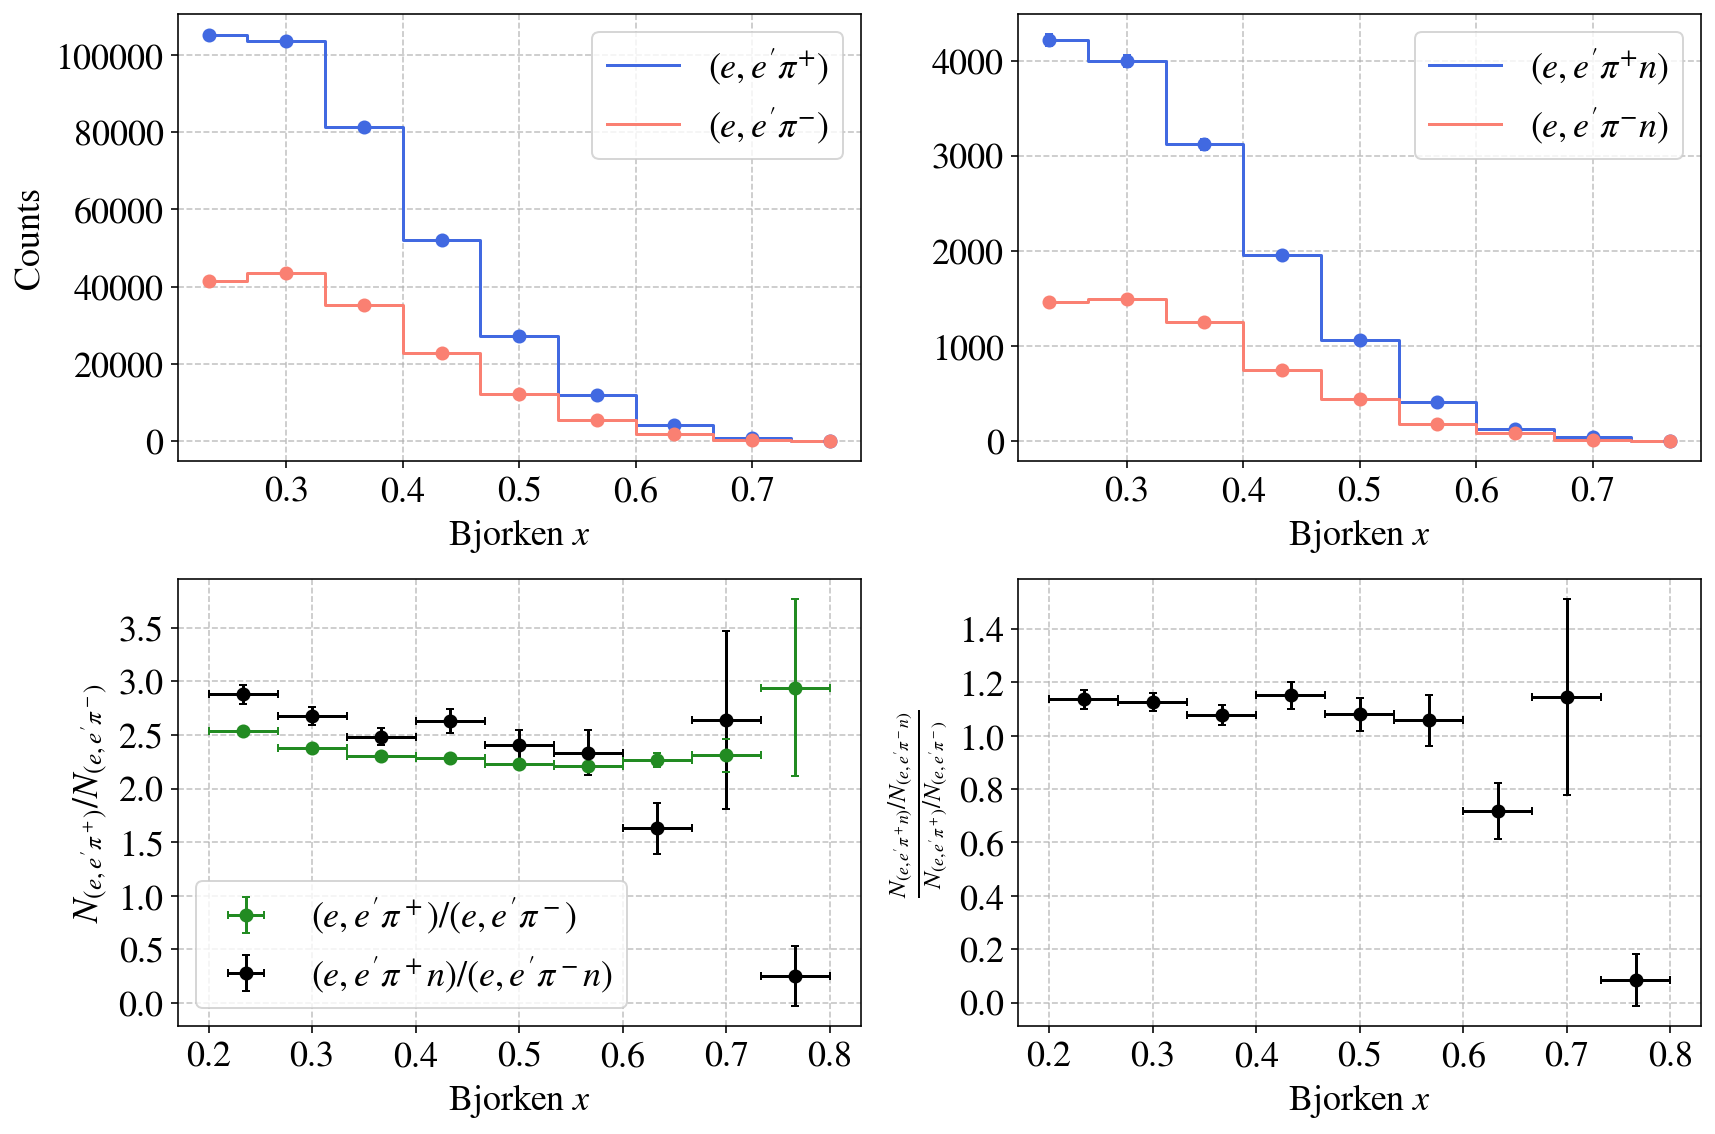

In [112]:
h        = dict()

fig = plt.figure(figsize=(12,8))
ax  = fig.add_subplot(2,2,1)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    x,h[pi_charge_name],x_err= plot_step_hist(df=e_e_pi[pi_charge_name], var='xB', bins=x_bins , label="$(e,e'"+pi_label+")$" )
set_axes(ax,'Bjorken $x$','Counts',do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,2)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    x,h[pi_charge_name + 'n'],x_err = plot_step_hist(df=e_e_pi_n[pi_charge_name], var='xB', bins=x_bins , label="$(e,e'"+pi_label+"n)$" )
set_axes(ax,'Bjorken $x$','',do_add_grid=True, do_add_legend=True, fontsize=fontsize)

ax  = fig.add_subplot(2,2,3)
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_pips_to_pims, yerr=R_e_e_pi_pips_to_pims_err ,
            marker='o', linestyle='None',
            capsize=2,
            color='forestgreen',label="$(e,e'\pi^+)/(e,e'\pi^-)$" )
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_n_pips_to_pims, yerr=R_e_e_pi_n_pips_to_pims_err , 
            marker='o', linestyle='None',
            capsize=2 ,
            color='black',label="$(e,e'\pi^+n)/(e,e'\pi^-n)$" )
set_axes(ax,'Bjorken $x$',"$N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}$",
         do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,4)
ax.errorbar( x=x, xerr=x_err, y=SuperR, yerr=SuperR_err,
            marker='o', linestyle='None',
            capsize=2,
            color='black')
set_axes(ax,'Bjorken $x$',"$\\frac{N_{(e,e'\pi^+n)}/N_{(e,e'\pi^-n)}}{N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}}$",
         do_add_grid=True, fontsize=fontsize)

plt.tight_layout()

In [51]:
x_bins

array([0.        , 0.08888889, 0.17777778, 0.26666667, 0.35555556,
       0.44444444, 0.53333333, 0.62222222, 0.71111111, 0.8       ])